## Median Household income vs Percent Unemployed by City 

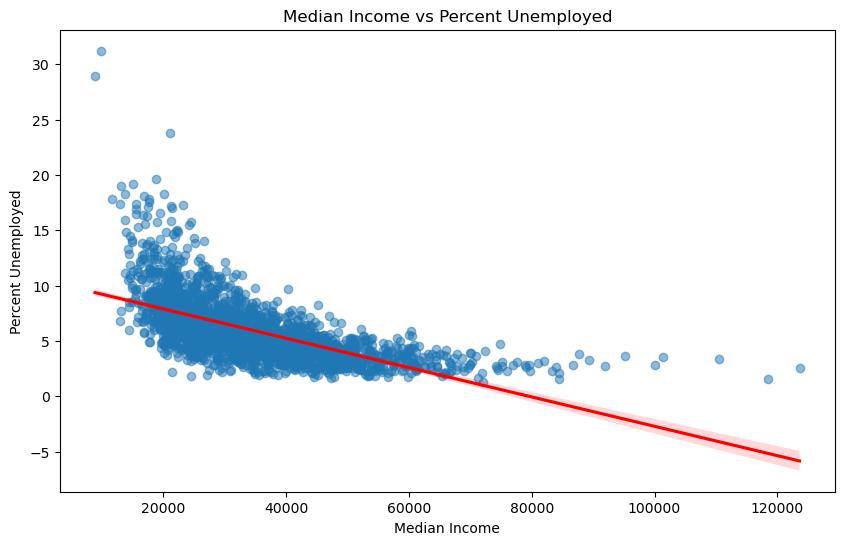

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Cleaned_Final_Data.csv'
data = pd.read_csv(file_path)

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='medincome', y='pctunemployed', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Median Income vs Percent Unemployed')
plt.xlabel('Median Income')
plt.ylabel('Percent Unemployed')
plt.show()


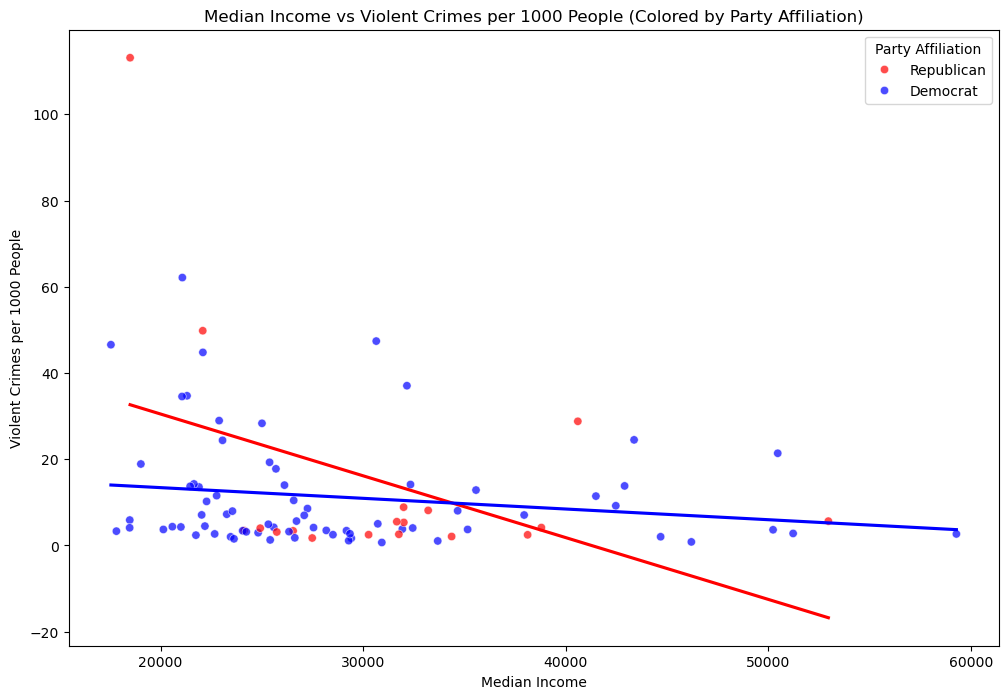

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Cleaned_Final_Data.csv'
data = pd.read_csv(file_path)

# Ensure the 'population' column exists and calculate violent crimes per 1000 people
data['violentcrimes_per_1000'] = (data['violentcrimesperpop'] / data['population']) * 1000

# Filter data to include only rows with party affiliation as 'Republican' or 'Democrat'
filtered_data = data[data['party affiliation'].isin(['Republican', 'Democrat'])]

# Define custom color palette for party affiliation
party_palette = {'Republican': 'red', 'Democrat': 'blue'}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    hue='party affiliation', 
    palette=party_palette, 
    data=filtered_data,
    alpha=0.7
)

# Add separate regression lines for each party affiliation
for party, color in party_palette.items():
    sns.regplot(
        x='medincome', 
        y='violentcrimes_per_1000', 
        data=filtered_data[filtered_data['party affiliation'] == party], 
        scatter=False, 
        line_kws={'color': color},
        ci=None  # Removes the grey confidence interval
    )

# Add plot title and labels
plt.title('Median Income vs Violent Crimes per 1000 People (Colored by Party Affiliation)')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per 1000 People')
plt.legend(title='Party Affiliation')
plt.show()


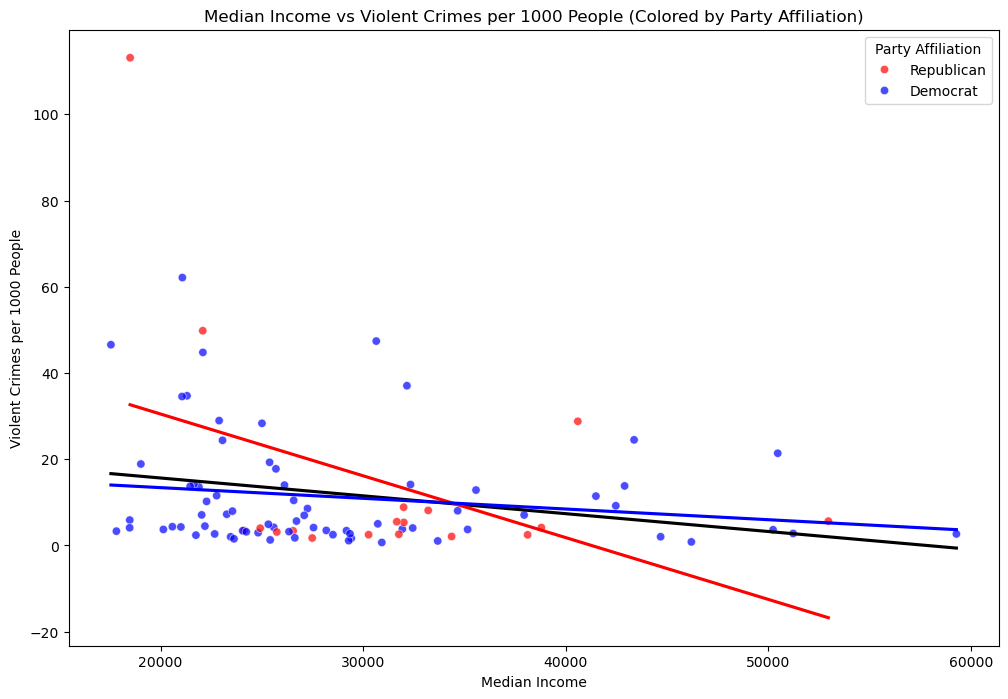

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Cleaned_Final_Data.csv'
data = pd.read_csv(file_path)

# Ensure the 'population' column exists and calculate violent crimes per 1000 people
data['violentcrimes_per_1000'] = (data['violentcrimesperpop'] / data['population']) * 1000

# Filter data to include only rows with party affiliation as 'Republican' or 'Democrat'
filtered_data = data[data['party affiliation'].isin(['Republican', 'Democrat'])]

# Define custom color palette for party affiliation
party_palette = {'Republican': 'red', 'Democrat': 'blue'}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    hue='party affiliation', 
    palette=party_palette, 
    data=filtered_data,
    alpha=0.7
)

# Add overall regression line (black)
sns.regplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    data=filtered_data, 
    scatter=False, 
    line_kws={'color': 'black'},
    ci=None  # Removes confidence interval
)

# Add separate regression lines for each party affiliation
for party, color in party_palette.items():
    sns.regplot(
        x='medincome', 
        y='violentcrimes_per_1000', 
        data=filtered_data[filtered_data['party affiliation'] == party], 
        scatter=False, 
        line_kws={'color': color},
        ci=None  # Removes confidence interval
    )

# Add plot title and labels
plt.title('Median Income vs Violent Crimes per 1000 People (Colored by Party Affiliation)')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per 1000 People')
plt.legend(title='Party Affiliation')
plt.show()


### Question 3: Regional Differences in Crime Rates
### Task: Highlight regions with the highest crime levels.

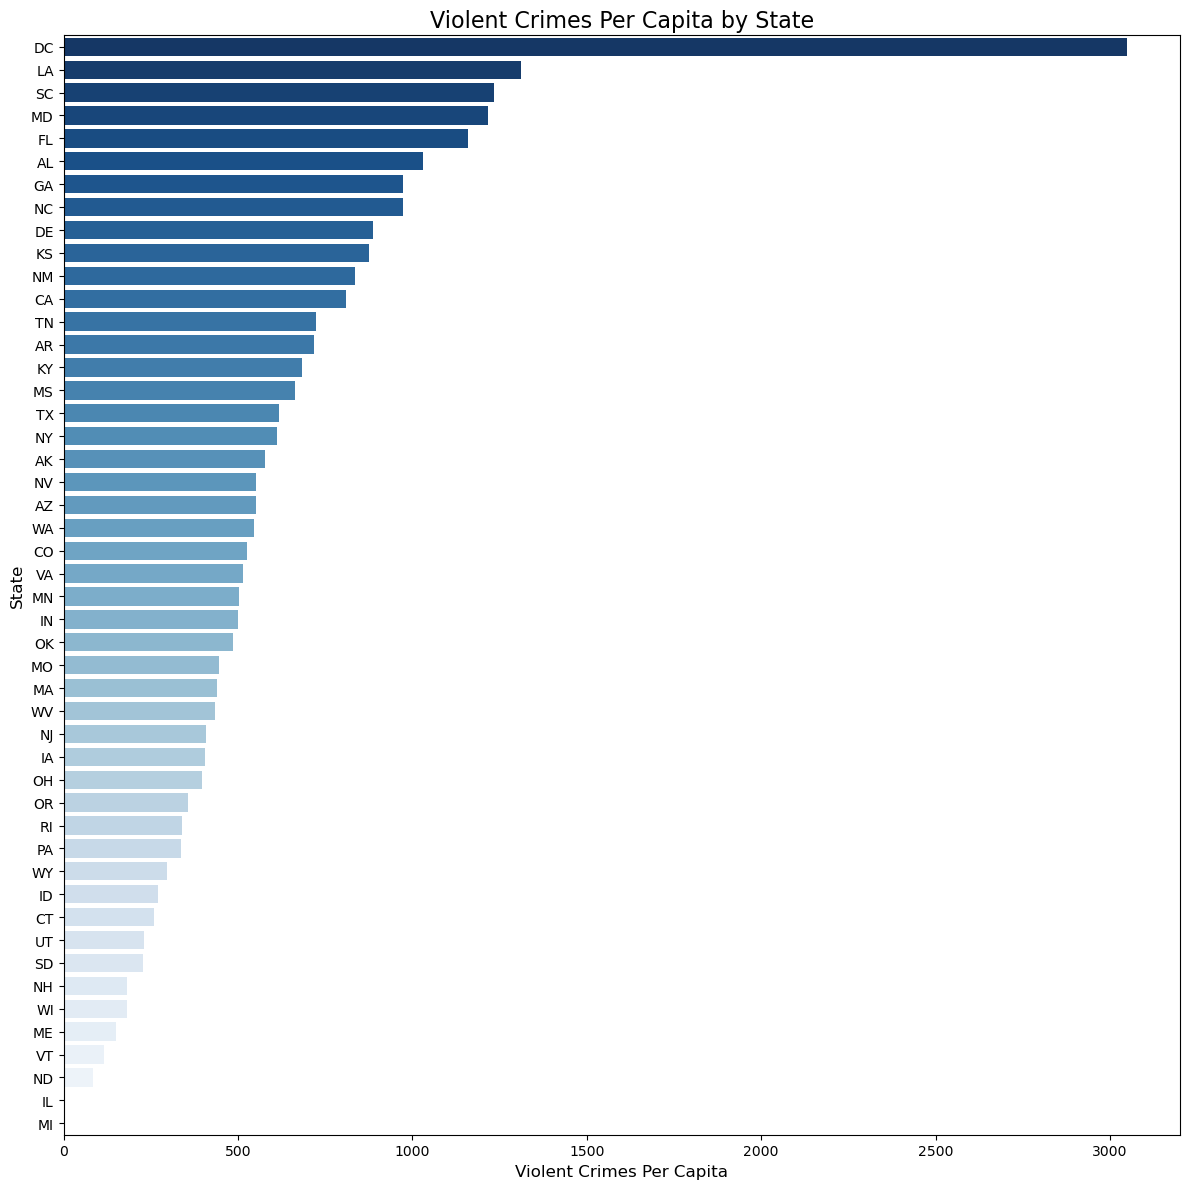

Top 5 states with the highest violent crime rates:
   state  violentcrimesperpop
7     DC          3048.380000
17    LA          1312.713636
37    SC          1233.455714
19    MD          1217.699167
9     FL          1159.046889


In [18]:
# Creating a state-wise heatmap of violent crime rates
state_crime = data.groupby('state')['violentcrimesperpop'].mean().reset_index()

# Sorting the data for visualization
state_crime = state_crime.sort_values('violentcrimesperpop', ascending=False)

# Plotting with improved readability
plt.figure(figsize=(12, 12))  # Increase figure size for better spacing
sns.barplot(
    data=state_crime,
    x='violentcrimesperpop',
    y='state',
    hue='state',  # Assign the 'state' variable to hue
    palette='Blues_r',  # Use palette for aesthetic color mapping
    legend=False  # Remove the legend since it's unnecessary
)
plt.title('Violent Crimes Per Capita by State', fontsize=16)
plt.xlabel('Violent Crimes Per Capita', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Keep states horizontal for clarity

# Adjusting layout
plt.tight_layout()
plt.show()

# Print the top 5 states with the highest violent crime rates
print("Top 5 states with the highest violent crime rates:")
print(state_crime.head())


### Question 4: Economic Instability and Crime Types
### Task: Correlate unemployment rates with property crimes and violent crimes.

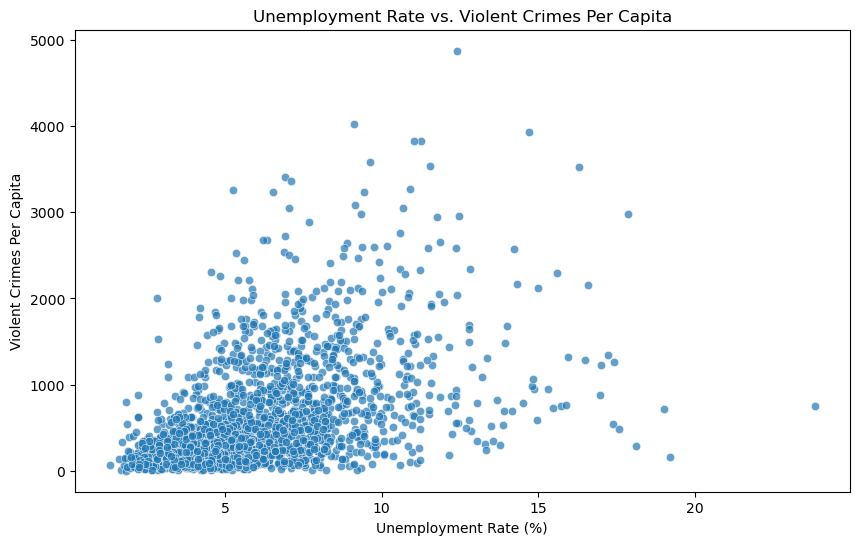

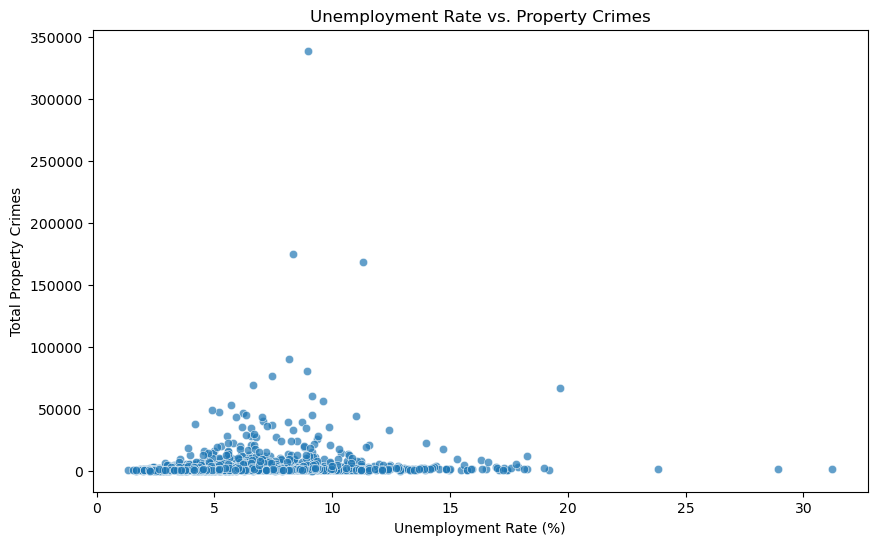

Correlation between Unemployment Rate and Violent Crimes: 0.48
Correlation between Unemployment Rate and Property Crimes: 0.13


In [28]:
# Scatterplot for Unemployment Rate (pctunemployed) vs. Violent Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pctunemployed', y='violentcrimesperpop', alpha=0.7)
plt.title('Unemployment Rate vs. Violent Crimes Per Capita')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Violent Crimes Per Capita')
plt.show()

# Summing property crimes (larcenies, burglaries, arsons) for each row
data['total_property_crimes'] = data[['larcenies', 'burglaries', 'arsons']].sum(axis=1)

# Scatterplot for Unemployment Rate (pctunemployed) vs. Property Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pctunemployed', y='total_property_crimes', alpha=0.7)
plt.title('Unemployment Rate vs. Property Crimes')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Total Property Crimes')
plt.show()

# Correlations
correlation_unemployment_violent = data['pctunemployed'].corr(data['violentcrimesperpop'])
correlation_unemployment_property = data['pctunemployed'].corr(data['total_property_crimes'])
print(f"Correlation between Unemployment Rate and Violent Crimes: {correlation_unemployment_violent:.2f}")
print(f"Correlation between Unemployment Rate and Property Crimes: {correlation_unemployment_property:.2f}")


### Question 5: Types of Crime Most Influenced by Economic Instability
### Task: Assess the impact of unemployment on specific types of property crime (e.g., larcenies, bulgaries, arsons).

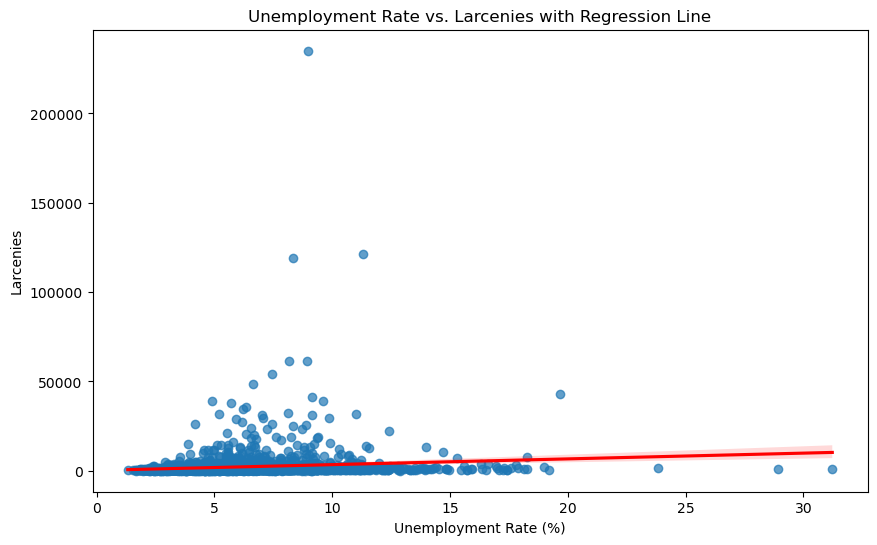

Correlation between Unemployment Rate and Larcenies: 0.12


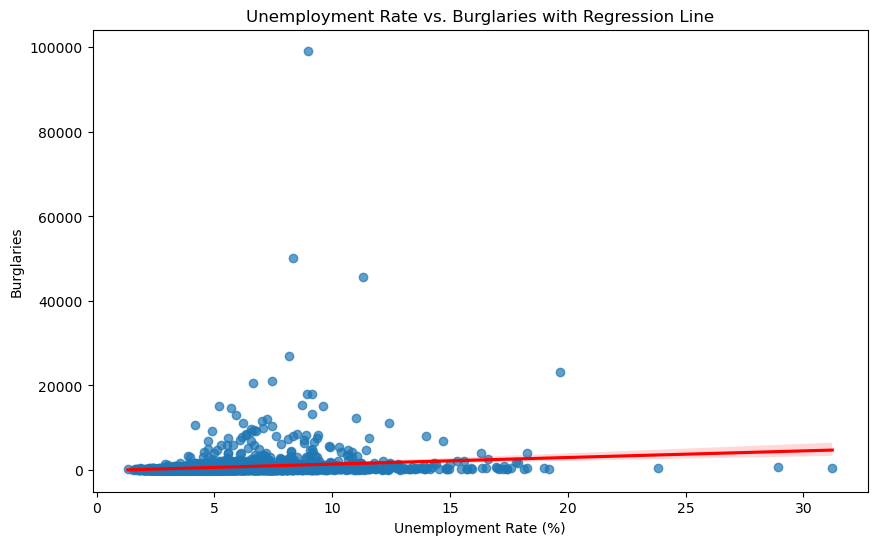

Correlation between Unemployment Rate and Burglaries: 0.15


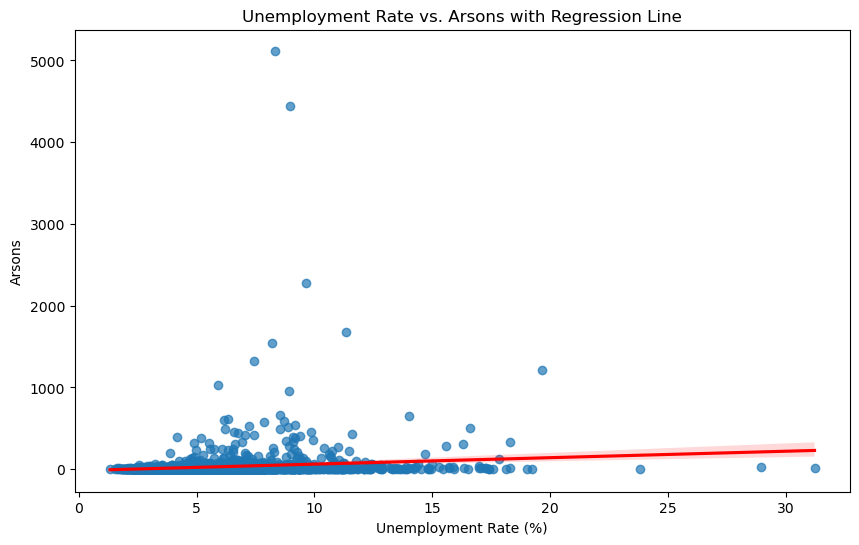

Correlation between Unemployment Rate and Arsons: 0.13


In [35]:
# Correct crime types list
crime_types = ['larcenies', 'burglaries', 'arsons']

# Grouped scatterplots with regression lines for unemployment rate (pctunemployed) vs. types of crime
for crime in crime_types:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=data, x='pctunemployed', y=crime, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
    plt.title(f'Unemployment Rate vs. {crime.capitalize()} with Regression Line')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel(crime.capitalize())
    plt.show()

    # Correlation calculation
    correlation = data['pctunemployed'].corr(data[crime])
    print(f"Correlation between Unemployment Rate and {crime.capitalize()}: {correlation:.2f}")
